## Import relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# import sklearn now instead of statsmodel
from sklearn.linear_model import LinearRegression

## Load the data

In [16]:
data = pd.read_csv('Data/sklearn_linear.csv')
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## create the regression

## Declare the dependent and independent variables

In [11]:
#In supervised machine learning, instead of saying variable, 
#we say feature/input & output/target too
x = data['SAT']
y = data['GPA']
#Above the input or feature is x since it is the independent variable/predictor
#Y is the output/target since it is what we are trying to predict.

In [14]:
x.shape, y.shape

((84,), (84,))

In [25]:
# the shape of x above is 1D and since sklearn doesnt fancy a 1D data,
# We must first transform the data into a 2D(array) data.
# We do this using the reshape() method passing first the length of the data
# which is 84 and then 1 for the dimension
x_matrix = x.values.reshape(84,1)
x_matrix.shape

(84, 1)

## Regression itself

In [26]:
# define an object for the model
reg = LinearRegression()

In [33]:
# Fit the model and pass as argument the input and target in the mentioned oreder.
reg.fit(x_matrix,y)

LinearRegression()

## The regression statistics
#### Note: The stats returned here are same with what we get using statsmodel, this has been confirmed by me!

## To get the R-squared

In [30]:
reg.score(x_matrix,y)

0.40600391479679765

## The Coefficient

In [31]:
reg.coef_
##This returns an array but since this is a linear regression, we will get
#just one element in the array. For multiple reg., we sure will have for all.

array([0.00165569])

## The Intercept

In [32]:
reg.intercept_

0.2750402996602803

## Making predictions
### We use the predict() function on the reg variable holding our regression analysis and then pass it the parameters in this case the SAT we want to predict a GPA for. This method returns an array because it can take more than one parameters and predict their outcomes at the same time.

In [39]:
reg.predict([[1740]]) # i.e SAT score of 1740

array([3.15593751])

In [40]:
# Now we try the predict() function on a dataframe
new_data = pd.DataFrame(data=[1740,1700], columns=['SAT'])
new_data

,SAT
0,1740
1,1700


In [41]:
# Predict for the values
reg.predict(new_data)

array([3.15593751, 3.08970998])

In [42]:
# Update the dataframe to contain the predicted GPAs
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1700,3.089710


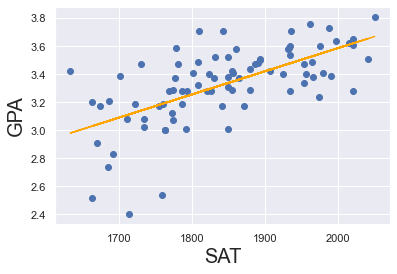

In [43]:
#Now plot the regression
plt.scatter(x,y)
yhat = reg.coef_ * x_matrix + reg.intercept_ #i.e b1x1 + b0
#yhat = 0.0017*x + 0.275
fig = plt.plot(x,yhat, c = 'orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()